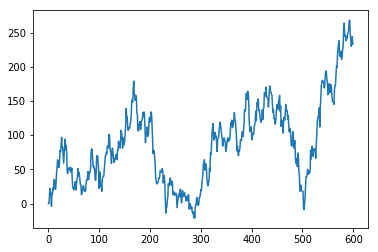

In [3]:
#1D random walk pattern
import numpy as np
import random
import matplotlib.pyplot as plt

n = 600; # walk n times
lis=[0]; # record each position
mu, sigma = 0, 1 # mean and standard deviation


count = 0;
for i in range(1,n):
    y = np.random.normal(mu, sigma)
    m = int(10*y)
    count = count + m*1 
    lis.append(count)

plt.plot(lis)
plt.show()

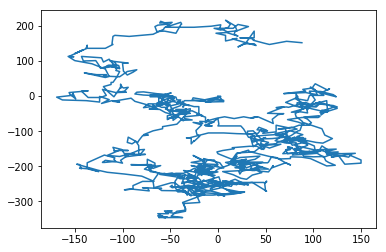

In [5]:
#2D random walk pattern
import numpy as np
import random
import matplotlib.pyplot as plt

n = 1000; # walk n times
lisx=[0]; # record each x position
lisy=[0]; # record each y position
mu, sigma = 0, 1 # mean and standard deviation


countx = 0;
county = 0;
for i in range(1,n):
    x = np.random.normal(mu, sigma)
    y = np.random.normal(mu, sigma)
    mx = int(10*x)
    countx = countx + mx
    lisx.append(countx)
    my = int(10*y)
    county = county + my
    lisy.append(county)

plt.plot(lisx,lisy)
plt.show()

Average to our experiment is -0.08592 .
Standard to our experiment is 22.355813064 .


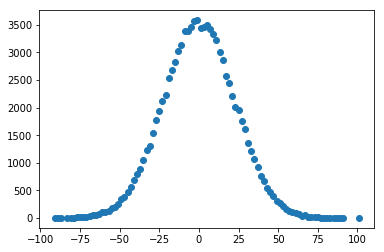

Theoretical mean value for random walk at n step is -5.62893041627e-16 .
Theoretical standard value for random walk at n step is 22.360679775 .


In [6]:
#1D random walk expectation and standard
import numpy as np
import random
import math
import matplotlib.pyplot as plt

k = 100000 # k runs
n = 500; # n steps
test = np.zeros(k);
p_forward = 0.5;
p_backward = 1 - p_forward;
meanwalk = 0;


for j in range(k):
    count = 0;
    for i in range(1,n):
        y = random.random()
        if  p_forward > y:
            count = count + 1
        else:
            count = count -1 
    test[j] = count
print "Average to our experiment is %s ." %(np.mean(test))
print "Standard to our experiment is %s ." %(np.std(test))

my_dict = {}
for i in test:
    if i not in my_dict:
        my_dict[i] = 1
    else:
        my_dict[i] += 1
# create x and y axis
x = []
y = []
for key in my_dict:
    x.append(key)
    y.append(my_dict[key])
plt.scatter(x,y)
plt.show()



## This part is for theoretical calculation
def C(n,j):
    a = math.factorial(n)
    b = math.factorial(j)
    c = math.factorial(n-j)
    return a/(b*c)

def P(n,j):
    return C(n,j)*(p_forward)**j * (p_backward)**(n-j)

a = 0;
mean = 0;
for i in range(n+1):
    mean = mean + P(n,i)*( -n + 2*i )
print "Theoretical mean value for random walk at n step is %s ." %(mean)

var = 0;
for i in range(n+1):
    var = var + P(n,i)*( -n + 2*i - mean )**2
standard = var**0.5
print  "Theoretical standard value for random walk at n step is %s ." %(standard)

In [9]:
#2D_collision animation
"""
need 'imagemagick'
open '2D_collision_final.py' by python in github
my result(I simulate for more step) is '2D_colision_animation_long.mp4'
because I don't set random seed ,your result may different from mine 
""""

('Download data from:', 'https://finance.yahoo.com/quote/GOOG/history/')
Save stock price as Google-Stock-Price.csv
('mean: ', -1.4405760877238736e-05, 'std: ', 0.018409422995128811)


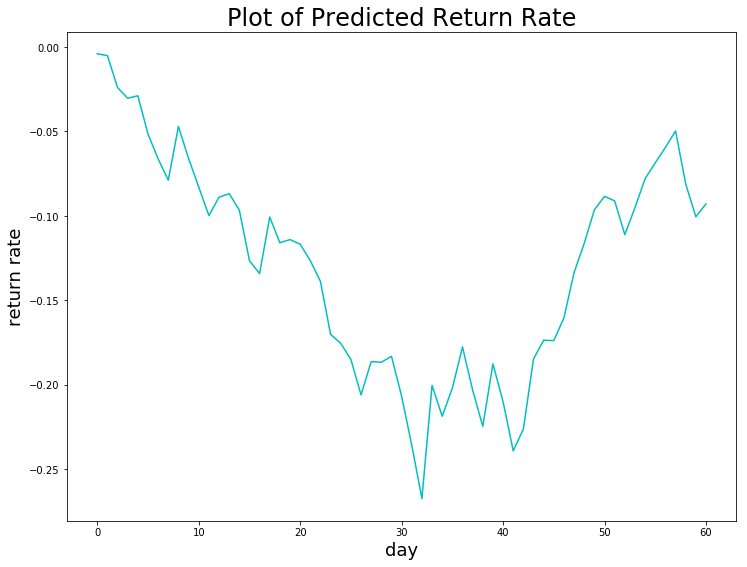

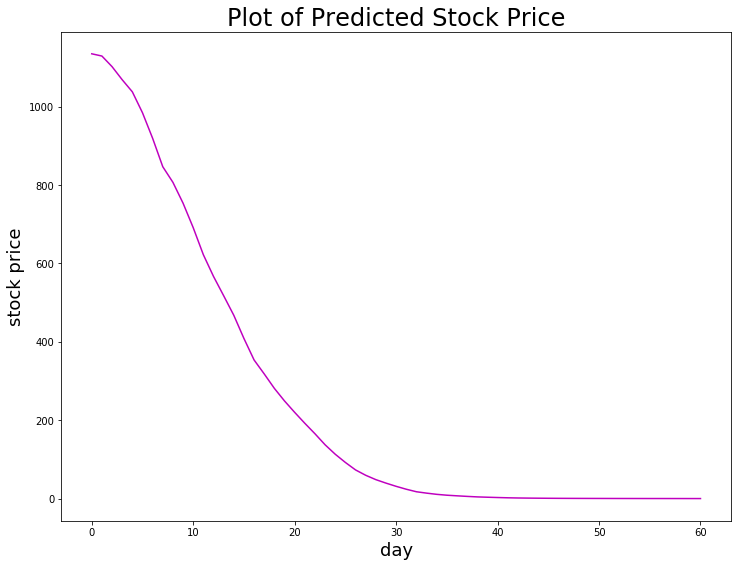

In [7]:
#stock prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup


# # 1. The company I choose is "Alphabet Inc. (GOOG)". I collected its stock price from Oct 27, 2017 to Mar 22, 2018.

# In[2]:


def get_historical_data(name, number_of_days):
    data = []
    url = 'https://finance.yahoo.com/quote/' + name + '/history/'
    print('Download data from:', url)
    respond = requests.get(url)
    content = respond.text
    soup = BeautifulSoup(content, 'html.parser')
    rows = soup.findAll('table')[0].tbody.findAll('tr')

    for each_row in rows:
        divs = each_row.findAll('td')
        if divs[1].span.text  != 'Dividend': #Ignore this row in the table
            #I'm only interested in 'Open' price; For other values, play with divs[1 - 5]
            data.append({'Date': divs[0].span.text, 
                         'Open': float(divs[1].span.text.replace(',','')), 
                         'High': float(divs[2].span.text.replace(',','')), 
                         'Low': float(divs[3].span.text.replace(',','')), 
                         'Close': float(divs[4].span.text.replace(',','')), 
                        'Adj Close': float(divs[5].span.text.replace(',','')),
                        'Volume': float(divs[6].span.text.replace(',',''))})

    return data[:number_of_days]

data = []
for i in get_historical_data('GOOG', 100):
    data.append(i)
data.reverse()
df = pd.DataFrame(data)
df.to_csv('Google-Stock-Price.csv')
print('Save stock price as Google-Stock-Price.csv')
df = pd.read_csv('Google-Stock-Price.csv', sep=',',header=0,index_col=0, parse_dates=True)


# In[3]:


df.head()


# In[4]:


df.tail()


# In[5]:


df.shape


# # 2. The mean and std of its stock price is 0.000640 and 0.0146

# In[6]:


return_rate = []
for i in range(df.shape[0] - 1):
    return_rate.append((df['Close'][i + 1] - df['Close'][i]) / df['Close'][i])
    
std = np.std(return_rate)
mean = np.mean(return_rate)


# In[7]:


print('mean: ', mean, 'std: ', std)


# In[8]:


predicted_rr = [return_rate[-1]]
for t in range(1, 61):
    predicted_rr.append(predicted_rr[-1] + mean * 1 + std * np.sqrt(1) * np.random.normal())         

predicted_price = [df['Close'][df.shape[0]-1]]
for t in range(1, 61):
    predicted_price.append((1 + predicted_rr[t]) * predicted_price[t - 1]) 


# # 3. Following is the plot of predicted return rate and predicted stock price

# In[9]:


plt.figure(figsize=(12, 9))
plt.plot(predicted_rr, 'c')
plt.xlabel('day', fontsize=18)
plt.ylabel('return rate', fontsize=18)
plt.title('Plot of Predicted Return Rate', fontsize=24)
plt.show()


# In[10]:


plt.figure(figsize=(12, 9))
plt.plot(predicted_price, 'm')
plt.xlabel('day', fontsize=18)
plt.ylabel('stock price', fontsize=18)
plt.title('Plot of Predicted Stock Price', fontsize=24)
plt.show()